### В данном исследовании проводится исследование процессов, происходящих в полиэтиленовом поршне при различных параметрах

![](nu.jpg)

In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [2]:
from tube import InterpXY,Tube
from math import *
import numpy as np
from pistonlayer import ElPistEOS, ElPistLayer
import pprint as pp

In [3]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

In [7]:
from dask.distributed import Client
import dask

cl = Client()
cl

D:\pyKas\env_pykas\lib\site-packages\distributed\dashboard\core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [WinError 10048] Обычно разрешается только одно использование адреса сокета (протокол/сетевой адрес/порт)
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:55918 Dashboard: http://127.0.0.1:55921/status,Cluster Workers: 4 Cores: 4 Memory: 8.48 GB


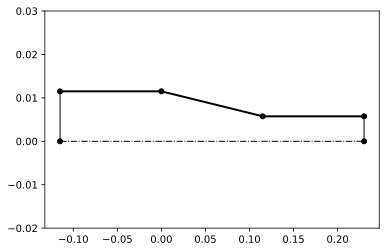

In [6]:
def get_tube(**kw):
    D_1 = kw.get('D_1', 23) * 1e-3 # D_1, mm
    D2_D1 = kw.get('D2_D1', 0.5)
    D_2 = D_1 * D2_D1
    L_D1 = kw.get('L_D1', 5)
    L = D_1 * L_D1
    tube_dict = {
        'tube_points': [[-L,D_1],[0, D_1],[L,D_2],[2*L, D_2]]
    }
    tube = Tube.get_standart(tube_dict)
    return tube

tube = get_tube()
ax, fig = plt.subplots()
tube.plot(ax, fig)
fig.set_ylim(-0.02, 0.03)
# fig.set_xlim(-6*d,d)
plt.show()

In [17]:
import time
def tsty(a):
    tube2 = get_tube()
    print(a)
    time.sleep(3)
    return str(tube2)

In [21]:
futs = [cl.submit(tsty, i) for i in range(100)]
futs

[<Future: status: finished, type: str, key: tsty-011d519ee8c5fe551eba40f85e5a5161>,
 <Future: status: finished, type: str, key: tsty-8e1521a8799846f49af722830a223a42>,
 <Future: status: finished, type: str, key: tsty-e4f69d425b569607eea1f67a765a82bc>,
 <Future: status: finished, type: str, key: tsty-6cf57900b277b8b0d1053383897c3896>,
 <Future: status: finished, type: str, key: tsty-ecd440dd3b610fa7ce8e7397fcdb4510>,
 <Future: status: finished, type: str, key: tsty-b85138f6ee92a9dcc1ba36ea3ce385c2>,
 <Future: status: finished, type: str, key: tsty-ac87b89b4e5d08420a88b5c06c2e3b03>,
 <Future: status: finished, type: str, key: tsty-2450f2e10743b861967fcb09a32e512a>,
 <Future: status: finished, type: str, key: tsty-627086dc4f4de0c6f2db5230aa889c3e>,
 <Future: status: finished, type: str, key: tsty-8a6e152e4c9d63ebe8ae986753ee4d77>,
 <Future: status: pending, key: tsty-b9753295c5e409976b9d878ebc3963b4>,
 <Future: status: pending, key: tsty-e2acbb13f4f049c479fc4657a6a67799>,
 <Future: status

In [20]:
futs

[<Future: status: finished, type: str, key: tsty-011d519ee8c5fe551eba40f85e5a5161>,
 <Future: status: finished, type: str, key: tsty-8e1521a8799846f49af722830a223a42>,
 <Future: status: finished, type: str, key: tsty-e4f69d425b569607eea1f67a765a82bc>,
 <Future: status: finished, type: str, key: tsty-6cf57900b277b8b0d1053383897c3896>,
 <Future: status: finished, type: str, key: tsty-ecd440dd3b610fa7ce8e7397fcdb4510>,
 <Future: status: finished, type: str, key: tsty-b85138f6ee92a9dcc1ba36ea3ce385c2>,
 <Future: status: finished, type: str, key: tsty-ac87b89b4e5d08420a88b5c06c2e3b03>,
 <Future: status: finished, type: str, key: tsty-2450f2e10743b861967fcb09a32e512a>,
 <Future: status: finished, type: str, key: tsty-627086dc4f4de0c6f2db5230aa889c3e>,
 <Future: status: finished, type: str, key: tsty-8a6e152e4c9d63ebe8ae986753ee4d77>]

In [ ]:
def get_pl(tube, **kw):
    pist_omega = kw.get('pist_omega', 200)/1000
    pist_layer_dict = {
        'type': 'pist',
        'omega': pist_omega,  # кг
        'p_0': kw.get('P_2', 1)*1e5, # начальное давление в полиэтилене
        'u_0': 0,     #начальная скорость
        'ElPistEOS_kwargs': dict(
            k=1.63098, 
            c_0=2308, 
            ro_0=919.03, 
            sigma_star=25.2, 
            k_0=0.054, 
            b_1=0.027, 
            b_2=0.00675, 
            tau_0=1.36, 
            mu=0.001, 
            tau_s=1,                 
            zeroP=False, 
            zeroE=True)
    }
    calc_settings_pist = {
        'cell_dx': 0.001,
    #     'n_cells': 600,
        'n_cells_min': 13,
        'n_cells_max': 100,
        'GasFluxCalculator_kwargs': {'flux_type':1},
        'GridStrecher_kwargs': {}
    }
    pist_lr = ElPistLayer.get_standart(tube, 0, pist_layer_dict, calc_settings_pist) 